# Word2Vec 실습

## 영어 word2vec

In [31]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [32]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7fd92d70e6a0>)

In [33]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [34]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [35]:
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [36]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [37]:
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

model_result = model.wv.most_similar('man')
print(model_result)

[('woman', 0.8334362506866455), ('guy', 0.8185007572174072), ('lady', 0.7767740488052368), ('boy', 0.7581679224967957), ('girl', 0.7372376918792725), ('gentleman', 0.730574905872345), ('kid', 0.7141732573509216), ('soldier', 0.6821604371070862), ('photographer', 0.6707069277763367), ('poet', 0.6615515351295471)]


## 한국어 word2vec

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm

In [18]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7ff982a095b0>)

In [19]:
train_data = pd.read_table('ratings.txt')
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [22]:
train_data.dropna(how='any', inplace=True)

In [23]:
# 불용어 제거
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [25]:
okt = Okt()
sentence = train_data['document'].values[0]
okt.morphs(sentence, stem=True)

['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ']

In [28]:
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True)
    stopwords_removed_sentence = [w for w in tokenized_sentence if w not in stopwords]
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████████████████████████████████████████████████████████████████| 199992/199992 [11:56<00:00, 279.23it/s]


리뷰의 최대 길이 : 95
리뷰의 평균 길이 : 12.338453538141525


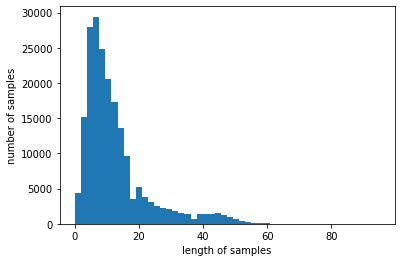

In [29]:
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [30]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, vector_size=100, window=5, min_count=5, workers=4, sg=1)

In [37]:
print(model.wv.most_similar("최민식"))

[('한석규', 0.8427351713180542), ('김명민', 0.8418174982070923), ('문소리', 0.8288613557815552), ('서영희', 0.814567506313324), ('안성기', 0.8112744688987732), ('이정재', 0.8036726713180542), ('박해일', 0.8015318512916565), ('유다인', 0.7929420471191406), ('채시라', 0.7925094962120056), ('김창완', 0.7911495566368103)]


# SGNS(Skip-Gram with Neagtive Sampling)

## 데이터셋 준비

In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [5]:
# 데이터 전처리

news_df = pd.DataFrame({'document': documents})
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

news_df.replace("", float("NaN"), inplace=True)
news_df.dropna(inplace=True)

len(news_df)

/var/folders/ph/pv7rmwrx0yl4zl9pm78d51hm0000gn/T/ipykernel_54685/3836568661.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")


10995

In [6]:
# 불용어를 제거
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

In [7]:
# 단어가 1개 이하인 샘플의 인덱스를 찾아서 저장하고, 해당 샘플들은 제거.
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)
print('총 샘플 수 :',len(tokenized_doc))

총 샘플 수 : 10940


/Users/timber/opt/anaconda3/envs/NLP_tf/lib/python3.8/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [9]:
vocab_size = len(word2idx) + 1 
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 64277


In [ ]:
from time import time
from tensorflow.keras.preprocessing.sequence import skipgrams
# 네거티브 샘플링
t = time()
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded]
print(f'total time : {time()-t}')

In [ ]:
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

## 모델 구현

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [ ]:
import sys
import torch.nn as nn
import torch
sys.path.append('/Users/timber/Personal/Study/NLP_study_tf')
from models.sgns import SGNS


embedding_dim = 100
lr = 0.01
model = SGNS(vocab_size=vocab_size, embedding_dim=embedding_dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
from sklearn.metrics import accuracy_score

for epoch in range(1, 201):
    train_losses, train_accs = [], []
    
    model.train()
    for inp, label in zip(X, y):
        inp = torch.Tensor([inp]).long()
        label = torch.Tensor(label).long()
        optimizer.zero_grad()
        output = model(inp)
        label_unsqueeze = torch.unsqueeze(label, 0)
        loss = criterion(output[0], torch.max(label_unsqueeze, 1)[1])

        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())
    print(f"epoch {epoch:.2f} :: {np.average(train_losses)}")

In [18]:
model

SGNS(
  (embedding): Embedding(64277, 100)
  (sigmoid): Sigmoid()
)

In [25]:
model.load_state_dict(torch.load('/Users/timber/Personal/Study/NLP_study_tf/models/sgns_model'))
model.eval()

# 글로브 (GloVe)

In [27]:
!pip install glove_python_binary

ERROR: Could not find a version that satisfies the requirement glove_python_binary (from versions: none)
ERROR: No matching distribution found for glove_python_binary


glove-python-binary가 더이상 지원 안하나..?

# 패스트텍스트(FastText)

맨 위 Word2Vec을 먼저 실행하고 실행해야 된다

In [38]:
model.wv.most_similar("electrofishing")

KeyError: "Key 'electrofishing' not present"

In [42]:
from gensim.models import FastText
model = FastText(result, vector_size=100, window=5, min_count=5, workers=4, sg=1)

In [43]:
model.wv.most_similar("electrofishing")

[('electrolyte', 0.8709851503372192),
 ('electrolux', 0.8707529306411743),
 ('electro', 0.8637531399726868),
 ('electroshock', 0.8580990433692932),
 ('electrochemical', 0.8394168615341187),
 ('electric', 0.8341692686080933),
 ('electroencephalogram', 0.8331431746482849),
 ('electrogram', 0.8274303674697876),
 ('airbus', 0.8229468464851379),
 ('electron', 0.8227265477180481)]

# Embedding

## 데이터셋 준비

In [1]:
import torch.nn as nn
import torch
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

16


In [4]:
X_encoded = tokenizer.texts_to_sequences(sentences)
print(X_encoded)

[[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [37]:
max_len = max(len(l) for l in X_encoded)

X_train = pad_sequences(X_encoded, maxlen=max_len, padding='post')
y_train = np.array(y_train)
print(X_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [9]:
X_train

array([[ 1,  2,  3,  4],
       [ 5,  6,  0,  0],
       [ 7,  8,  0,  0],
       [ 9, 10,  0,  0],
       [11, 12,  0,  0],
       [13,  0,  0,  0],
       [14, 15,  0,  0]], dtype=int32)

## 모델 학습

In [53]:
embedding_dim = 4

class EMB(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.embedding = nn.Embedding(num_embeddings=vocab_size,
                                      embedding_dim=embedding_dim)
        self.linear = nn.Linear(16, 1)
        
    def forward(self, inp):
        output = self.embedding(inp)
        output = nn.Flatten()(output)
        output = self.linear(output)
        return output
    
model = EMB(vocab_size, embedding_dim)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


from sklearn.metrics import accuracy_score

for epoch in range(1, 201):
    train_losses, train_accs = [], []
    
    model.train()
    for inp, label in zip(X_train, y_train):
        inp = torch.Tensor([inp]).long()
        label = torch.Tensor([label]).float()
        optimizer.zero_grad()
        output = model(inp)
        loss = criterion(output[0], label)

        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())
    print(f"epoch {epoch:.2f} :: {np.average(train_losses)}")

epoch 1.00 :: 0.9880989279065814
epoch 2.00 :: 0.8543796965054103
epoch 3.00 :: 0.7737449833324977
epoch 4.00 :: 0.7118992635181972
epoch 5.00 :: 0.6624553714479718
epoch 6.00 :: 0.6214179907526288
epoch 7.00 :: 0.5855755167348045
epoch 8.00 :: 0.5523378465856824
epoch 9.00 :: 0.5198567977973393
epoch 10.00 :: 0.48704048565455843
epoch 11.00 :: 0.4534243089812143
epoch 12.00 :: 0.41900969190256937
epoch 13.00 :: 0.3841209411621094
epoch 14.00 :: 0.34928392086710247
epoch 15.00 :: 0.3151185427393232
epoch 16.00 :: 0.28224595742566244
epoch 17.00 :: 0.2512142817888941
epoch 18.00 :: 0.2224483617714473
epoch 19.00 :: 0.19622544199228287
epoch 20.00 :: 0.17267438769340515
epoch 21.00 :: 0.15179237936224257
epoch 22.00 :: 0.13347151981932776
epoch 23.00 :: 0.11752986535429955
epoch 24.00 :: 0.10374107477920395
epoch 25.00 :: 0.09185993352106639
epoch 26.00 :: 0.08164194093218871
epoch 27.00 :: 0.07285604013928346
epoch 28.00 :: 0.06529285625687667
epoch 29.00 :: 0.05876761382179601
epoch 30

## 사전훈련 GloVe

In [54]:
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall() 
zf.close()

In [57]:
embedding_dict = dict()

f = open('dataset/glove.6B.100d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]

    # 100개의 값을 가지는 array로 변환
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
    embedding_dict[word] = word_vector_arr
f.close()

print(f'{len(embedding_dict)}개의 Embedding vector가 있습니다.')

400000개의 Embedding vector가 있습니다.


In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))
np.shape(embedding_matrix)

In [ ]:
for word, index in tokenizer.word_index.items():
    # 단어와 맵핑되는 사전 훈련된 임베딩 벡터값
    vector_value = embedding_dict.get(word)
    if vector_value is not None:
        embedding_matrix[index] = vector_value

In [ ]:
embedding_dim = 4

class EMB_GLOVE(nn.Module):
    def __init__(self, vocab_size, embedding_dim, embedding_matrix):
        super().__init__()
        self.embedding = nn.Embedding(num_embeddings=vocab_size,
                                      embedding_dim=embedding_dim,
                                      padding_idx=embedding_matrix)
        self.linear = nn.Linear(16, 1)
        
    def forward(self, inp):
        output = self.embedding(inp)
        output = nn.Flatten()(output)
        output = self.linear(output)
        return output
    
model = EMB_GLOVE(vocab_size, embedding_dim, embedding_matrix)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


from sklearn.metrics import accuracy_score

for epoch in range(1, 201):
    train_losses, train_accs = [], []
    
    model.train()
    for inp, label in zip(X_train, y_train):
        inp = torch.Tensor([inp]).long()
        label = torch.Tensor([label]).float()
        optimizer.zero_grad()
        output = model(inp)
        loss = criterion(output[0], label)

        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())
    print(f"epoch {epoch:.2f} :: {np.average(train_losses)}")

* Google 사의 word2vec 모델을 가져오는건 GloVe랑 다를 부분이 없으니 생략